# 1.Collect Initial Data

In [1]:
import glob
import os
import numpy as np
import seaborn as sb
sb.set()
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import os
if os.environ.get("AITUEDATA"):
    print('set')
    data_directory = os.environ['AITUEDATA']
else:
    print('not set')
    #Eusebio
    # data_directory = "C:/Users/joaquin/Desktop/mem_aitue/Datos/"
    #Mini-Eusebio
    # data_directory = "C:/Users/jquin/Desktop/Memoria de Titulo/Aitue/Datos/"
    #PC-Mem
    data_directory = "C:/Users/Joaquin/Desktop/mem_aitue/Datos/"

set


In [3]:

file_names = [os.path.basename(x) for x in glob.glob(data_directory+"/[!~]*.xlsx")]
dir_files = glob.glob(data_directory+"/[!~]*.xlsx")

# del file_names[-1]
# del dir_files[-1]

print(file_names)
# print(dir_files)

['AltosDelValle_Cotizaciones.xlsx', 'AltosDelValle_Negocios.xlsx', 'Junge_Cotizaciones.xlsx', 'Junge_Negocios.xlsx', 'Mil610_Cotizaciones.xlsx', 'Mil610_Negocios.xlsx', 'SanAndresDelValle_Cotizaciones.xlsx', 'SanAndresDelValle_Negocios.xlsx', 'Urban_Cotizaciones.xlsx', 'Urban_Negocios.xlsx']


In [4]:
project_names = [];project_types = [];project_file_types = []
for file in file_names:
    project_names.append(file.split('_')[0])
    project_types.append(file.split('_')[1].split('.')[0])
    project_file_types.append(file.split('.')[1])

In [5]:
dfs = []

for file_dir in dir_files:
    df = pd.read_excel(file_dir,header=0)
    dfs.append(df)


In [6]:
def get_col_group_description(df,col):
    num_cot = []
    info = dict()
    for group, frame in df.groupby(col):
        num_cot.append(len(frame))
    #     print('There are ' + str(len(frame)) + ' records in group ' + str(group) + ' for processing.')

    cot_serie = pd.Series(num_cot)
    info['count'] = cot_serie.count()
    info['max'] = cot_serie.max()
    info['mean'] = cot_serie.mean()
    info['std'] = cot_serie.std()
    return info

# get_col_group_description(dfs[0],'RUT')
#dfs[0].groupby('RUT')['RUT'].count()

# 2.Describe Data

### 2.1.Data Description Single File: Cotizacion

In [7]:
cot_resume = pd.DataFrame()

cot_index = [index for index in range(0,len(project_types)) if project_types[index] == 'Cotizaciones']
cot_names = [project_names[index] for index in range(0,len(project_names)) if index in cot_index]
cot_types = [project_types[index] for index in range(0,len(project_types)) if index in cot_index]
cot_ftypes = [project_file_types[index] for index in range(0,len(project_file_types)) if index in cot_index]

cot = [dfs[index] for index in range(0,len(dfs)) if index in cot_index]

#start description
cot_resume['filas'] = [x.shape[0] for x in cot]
cot_resume['proyecto'] = cot_names
cot_resume['cols'] = [x.shape[1] for x in cot]
cot_resume['fecha_min'] = [pd.to_datetime(x['Fecha Cotizacion'].tolist()).min() for x in cot]
cot_resume['fecha_max'] = [pd.to_datetime(x['Fecha Cotizacion'].tolist()).max() for x in cot]
cot_resume['ruts_unicos'] = [len(x['RUT'].unique()) for x in cot]
cot_resume['ruts_mean'] = [get_col_group_description(x,'RUT')['mean'] for x in cot]
cot_resume['ruts_std'] = [get_col_group_description(x,'RUT')['std'] for x in cot]
cot_resume['ruts_max'] = [get_col_group_description(x,'RUT')['max'] for x in cot]



In [8]:
cot_resume

,filas,proyecto,cols,fecha_min,fecha_max,ruts_unicos,ruts_mean,ruts_std,ruts_max
0,496,AltosDelValle,41,2017-07-27 15:46:54,2018-05-20 17:58:24.067,257,1.929961,1.356033,10
1,830,Junge,41,2016-01-19 08:53:16,2018-05-21 17:33:47.000,335,2.477612,2.406069,20
2,1791,Mil610,41,2016-09-22 16:36:03,2018-05-22 13:33:02.000,775,2.310968,1.891111,16
3,10558,SanAndresDelValle,41,2013-08-19 16:58:26,2018-05-22 13:42:53.000,3816,2.766771,2.780687,45
4,2917,Urban,41,2017-03-24 18:36:24,2018-05-22 13:27:15.000,1365,2.136996,1.645081,13


In [9]:
cot_resume.describe()

,filas,cols,ruts_unicos,ruts_mean,ruts_std,ruts_max
count,5.000000,5.0,5.000000,5.000000,5.000000,5.000000
mean,3318.400000,41.0,1309.600000,2.324462,2.015796,20.800000
std,4155.236371,0.0,1468.734081,0.320175,0.575681,14.024978
min,496.000000,41.0,257.000000,1.929961,1.356033,10.000000
25%,830.000000,41.0,335.000000,2.136996,1.645081,13.000000
50%,1791.000000,41.0,775.000000,2.310968,1.891111,16.000000
75%,2917.000000,41.0,1365.000000,2.477612,2.406069,20.000000
max,10558.000000,41.0,3816.000000,2.766771,2.780687,45.000000


### 2.2.Data Description Single File: Negocios

In [10]:
neg_resume = pd.DataFrame()

neg_index = [index for index in range(0,len(project_types)) if project_types[index] == 'Negocios']
neg_names = [project_names[index] for index in range(0,len(project_names)) if index in neg_index]
neg_types = [project_types[index] for index in range(0,len(project_types)) if index in neg_index]
neg_ftypes = [project_file_types[index] for index in range(0,len(project_file_types)) if index in neg_index]

neg = [dfs[index] for index in range(0,len(dfs)) if index in neg_index]

#start description
neg_resume['filas'] = [x.shape[0] for x in neg]
neg_resume['proyecto'] = neg_names
neg_resume['cols'] = [x.shape[1] for x in neg]
neg_resume['fecha_min'] = [pd.to_datetime(x['Fecha Cotizacion'].tolist()).min() for x in neg]
neg_resume['fecha_max'] = [pd.to_datetime(x['Fecha Cotizacion'].tolist()).max() for x in neg]
neg_resume['ruts_unicos'] = [len(x['RUT'].unique()) for x in neg]
neg_resume['ruts_mean'] = [get_col_group_description(x,'RUT')['mean'] for x in neg]
neg_resume['ruts_std'] = [get_col_group_description(x,'RUT')['std'] for x in neg]
neg_resume['ruts_max'] = [get_col_group_description(x,'RUT')['max'] for x in neg]

neg_resume['%es_anulados']  = [(len(x[x['Estado'] == 'Anulada'])/y) for x,y in zip(neg,neg_resume['filas'])]
neg_resume['%es_promesas']  = [(len(x[x['Estado'] == 'Promesado'])/y) for x,y in zip(neg,neg_resume['filas'])]
neg_resume['%es_reserva']   = [len(x[x['Estado'] == 'Reservado'])/y for x,y in zip(neg,neg_resume['filas'])]
neg_resume['%es_entregado']  = [(len(x[x['Estado'] == 'Entregado'])/y) for x,y in zip(neg,neg_resume['filas'])]
# neg_resume['%es_reserva']   = [len(x[x['Estado'] == 'Reservado'])/y for x,y in zip(neg,neg_resume['filas'])]
neg_resume['%esc_desistido'] = [len(x[x['Estado Comercial'] == 'Desistimiento'])/y for x,y in zip(neg,neg_resume['filas'])]
neg_resume['%esc_normal']    = [len(x[x['Estado Comercial'] == 'Normal'])/y for x,y in zip(neg,neg_resume['filas'])]

In [11]:
neg_resume

,filas,proyecto,cols,fecha_min,fecha_max,ruts_unicos,ruts_mean,ruts_std,ruts_max,%es_anulados,%es_promesas,%es_reserva,%es_entregado,%esc_desistido,%esc_normal
0,108,AltosDelValle,49,2017-07-27 15:46:58.750,2018-05-07 16:29:32.157,63,1.714286,1.312822,7,0.694444,0.240741,0.064815,0.000000,0.046296,0.944444
1,101,Junge,49,2016-01-25 13:21:02.013,2018-04-18 18:25:01.797,52,1.942308,1.487378,7,0.524752,0.079208,0.128713,0.000000,0.128713,0.801980
2,87,Mil610,49,2016-09-26 16:12:56.703,2018-05-17 11:55:49.837,54,1.611111,0.877747,5,0.517241,0.080460,0.068966,0.000000,0.068966,0.873563
3,1848,SanAndresDelValle,49,2013-08-19 18:35:56.620,2018-05-21 17:12:31.210,820,2.253659,1.807338,17,0.659091,0.094697,0.119048,0.018398,0.126623,0.830087
4,203,Urban,49,2017-03-27 17:03:29.563,2018-05-20 18:10:29.167,124,1.637097,1.177946,8,0.492611,0.349754,0.157635,0.000000,0.147783,0.837438


In [12]:
neg_resume.describe()

,filas,cols,ruts_unicos,ruts_mean,ruts_std,ruts_max,%es_anulados,%es_promesas,%es_reserva,%es_entregado,%esc_desistido,%esc_normal
count,5.000000,5.0,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,469.400000,49.0,222.600000,1.831692,1.332646,8.800000,0.577628,0.168972,0.107835,0.003680,0.103676,0.857503
std,772.020919,0.0,335.265268,0.269536,0.346602,4.711688,0.092131,0.121698,0.040010,0.008228,0.043578,0.054895
min,87.000000,49.0,52.000000,1.611111,0.877747,5.000000,0.492611,0.079208,0.064815,0.000000,0.046296,0.801980
25%,101.000000,49.0,54.000000,1.637097,1.177946,7.000000,0.517241,0.080460,0.068966,0.000000,0.068966,0.830087
50%,108.000000,49.0,63.000000,1.714286,1.312822,7.000000,0.524752,0.094697,0.119048,0.000000,0.126623,0.837438
75%,203.000000,49.0,124.000000,1.942308,1.487378,8.000000,0.659091,0.240741,0.128713,0.000000,0.128713,0.873563
max,1848.000000,49.0,820.000000,2.253659,1.807338,17.000000,0.694444,0.349754,0.157635,0.018398,0.147783,0.944444


### 2.3.Describe Data Combined Files: Cotizacion

In [13]:
# concat cotizaciones
cot_all = pd.concat(cot)
cot_all.to_excel(data_directory + 'cotizaciones_all.xlsx')
cot_all_resume = pd.DataFrame()

In [14]:
cot_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16592 entries, 0 to 2916
Data columns (total 41 columns):
ID                     16592 non-null int64
Fecha Cotizacion       16592 non-null datetime64[ns]
Medio                  16592 non-null object
Tipo de Medio          16060 non-null object
Proyecto               16592 non-null object
Etapa                  16592 non-null object
Productos              16509 non-null object
Presencial             14565 non-null object
Remoto                 13282 non-null object
Jefe Comercial         16592 non-null object
Ejecutivo Comercial    16592 non-null object
Total Productos        16562 non-null float64
Descuentos             16548 non-null float64
Valor Final Venta      16548 non-null float64
RUT                    16592 non-null object
Nombre                 16592 non-null object
Apellido 1             16553 non-null object
Apellido 2             16185 non-null object
Nombre Completo        16592 non-null object
Telefono               1994

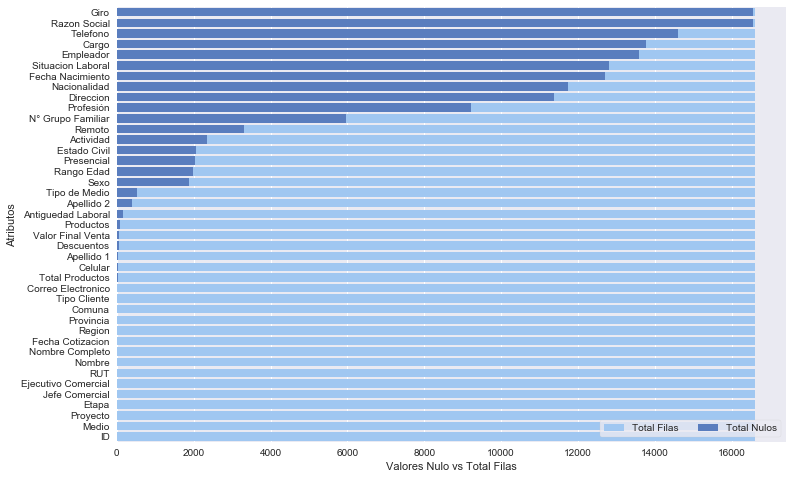

In [77]:
df = cot_all
null_columns = df.columns[df.isnull().any()]
nulos = df[null_columns].isnull().sum()

#view columns with null only
# null_columns = df.columns[df.isnull().any()]
# null_df = df[null_columns].isnull().sum()

#view all columns with its null count
null_columns = df.columns
null_df =  df.shape[0] - df.count()

null_df = pd.DataFrame({'Total':null_df,'Etiquetas':null_columns})

columnas = null_columns.copy()
filas = [df.shape[0]] * len(null_columns)

totales = pd.DataFrame({'Total':filas,'Etiquetas':columnas})

f, ax = plt.subplots(figsize=(12, 8))

sb.set_color_codes("pastel")
sb.barplot(data=totales.sort_values(by='Total',ascending=False), x='Total', y='Etiquetas',color="b",label="Total Filas")

sb.set_color_codes("muted")
sb.barplot(data=null_df.sort_values(by='Total',ascending=False), x='Total', y='Etiquetas',color="b",label="Total Nulos")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set( ylabel="Atributos", xlabel="Valores Nulo vs Total Filas")
# sb.despine(left=True, bottom=True)
f.savefig("cot_all_attributes.png")

In [16]:
#Variables categoricas
def ver_atributo_categorico(df,col,limit=False,lim=10,log=False,hue=None,palette=None):
    l = df[col].unique().tolist()
    l_len = len(l)
    
    if log:
        print(l_len,l)
    
    sb.set_color_codes("muted")
    if limit:
        return sb.countplot(y=col, data=df, color="r", order=df[col].value_counts().index[:lim],hue=hue,palette=palette);
    else:
        return sb.countplot(y=col, data=df, color="r", order=df[col].value_counts().index[:l_len],hue=hue,palette=palette);

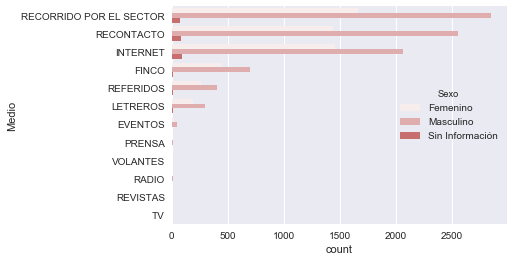

In [17]:
ver_atributo_categorico(cot_all,'Medio',hue='Sexo')

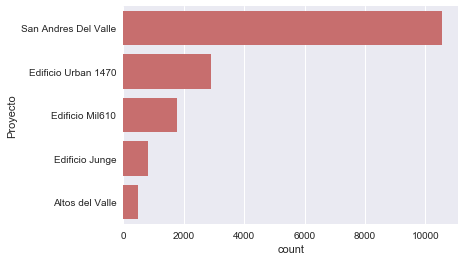

In [18]:
ver_atributo_categorico(cot_all,'Proyecto')

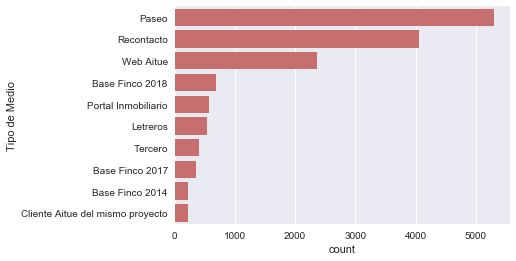

In [19]:
ver_atributo_categorico(cot_all,'Tipo de Medio',lim=10,limit=True)

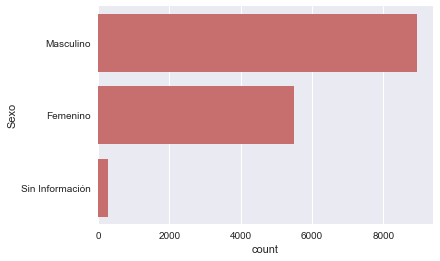

In [20]:
ver_atributo_categorico(cot_all,'Sexo')

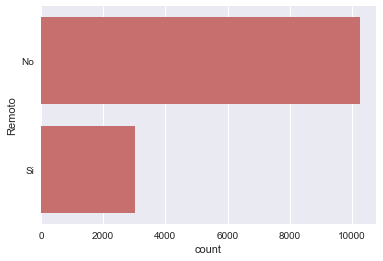

In [21]:
ver_atributo_categorico(cot_all,'Remoto')

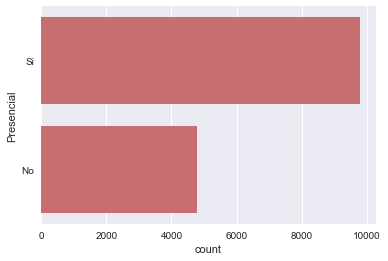

In [22]:
ver_atributo_categorico(cot_all,'Presencial')

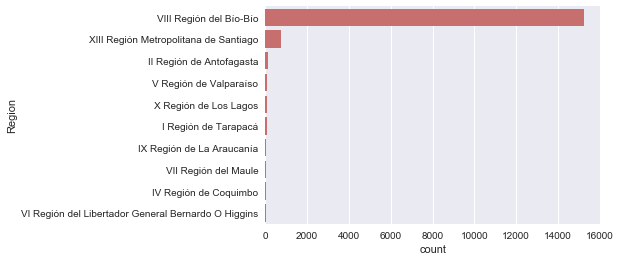

In [23]:
ver_atributo_categorico(cot_all,'Region',lim=10,limit=True)

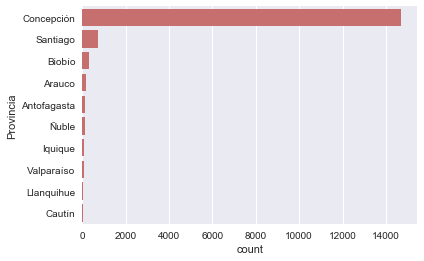

In [24]:
ver_atributo_categorico(cot_all,'Provincia',lim=10,limit=True)

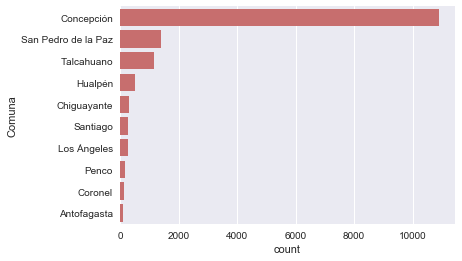

In [25]:
ver_atributo_categorico(cot_all,'Comuna',lim=10,limit=True)

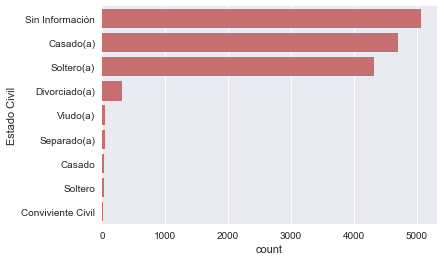

In [26]:
ver_atributo_categorico(cot_all,'Estado Civil')

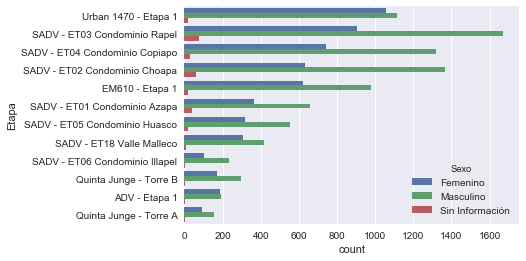

In [27]:
palette=["C0","C1","C2"]
ver_atributo_categorico(cot_all,'Etapa',hue='Sexo',palette=palette)

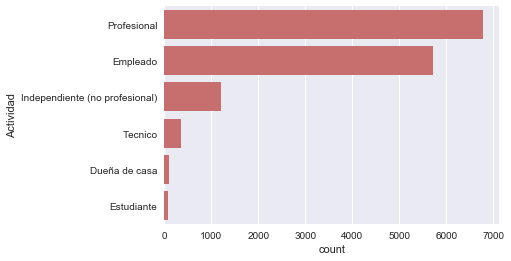

In [67]:
ver_atributo_categorico(cot_all,'Actividad')

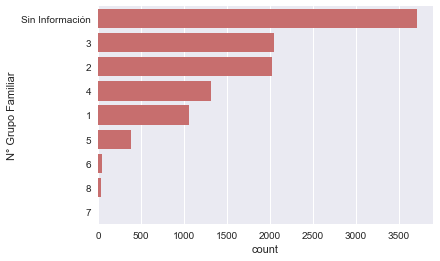

In [70]:
ver_atributo_categorico(cot_all,'N° Grupo Familiar')

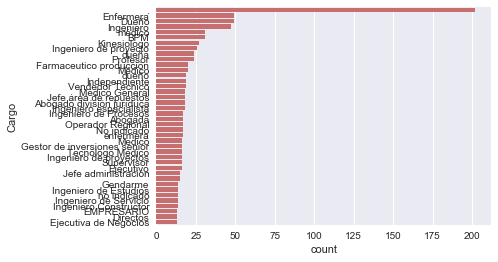

In [74]:
ver_atributo_categorico(cot_all,'Cargo',limit=True,lim=40)

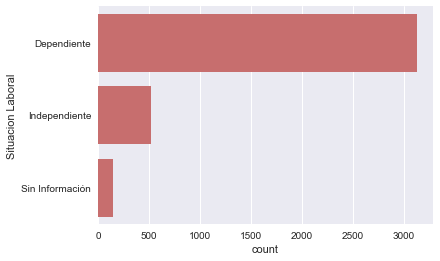

In [75]:
ver_atributo_categorico(cot_all,'Situacion Laboral')

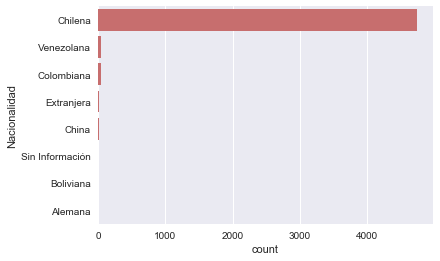

In [76]:
ver_atributo_categorico(cot_all,'Nacionalidad')

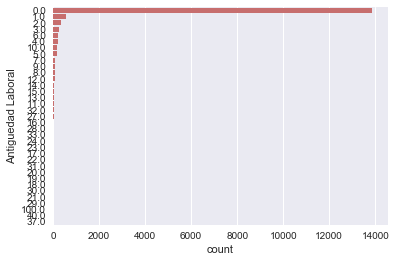

In [105]:
ver_atributo_categorico(cot_all,'Antiguedad Laboral')

510 [nan, 'a', 'Norteamericano / USS / UDD', 'Cesfam Lautaro Caceres', 'BioForest S.A.', 'DGAC', 'ACCIONA agua', 'Constructora Aitue \xa0\xa0\xa0', 'Arrigoni Ing.Y Const. S.A', 'Soc. Transportes Maritimo Service Ltda', 'Traumatologico', 'Besalco MD Montajes', 'Management Solutions Limitada', 'Forestal Celco', 'Caufmann', 'Inmobiliaria Los Pellines S.A.', 'MOP', '*', 'DFV Ingeniería y Gestión', 'Clinical Service', 'Hospital de Tomé', 'Municipalidad de Penco', 'Sanatorio Aleman \xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0', 'Huachipato', 'Catim', 'CAP \xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0', 'Municipalidad de Lota', 'Banco Estado', 'SVTI', 'Forestal papelera concepción', 'H&M Hennes & Mauritz SPA', '.', 'Chilena Consolidada seguros generales', 'Sociedad Educacional Juan Bosco LTDA', 'DAEM Hualpen', 'Ausenco Chile LTDA', 'HOSPITAL CLINICO DEL SUR SPA', 'Corporación Adventista \xa0\xa0\xa0\xa0\xa0\xa0\xa0', '\xa0\xa0

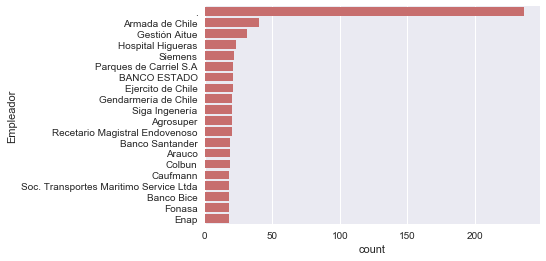

In [106]:
ver_atributo_categorico(cot_all,'Empleador',log=True, limit = True, lim=20)

3 ['Natural', 'Jurídico', nan]


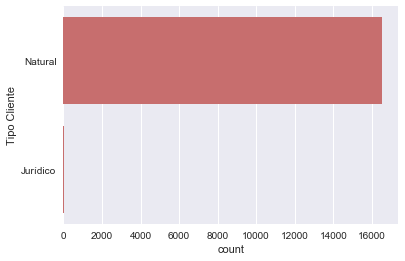

In [107]:
ver_atributo_categorico(cot_all,'Tipo Cliente',log=True, limit = True, lim=20)

[Text(0.5,0,'total'), Text(0.5,0,'total')]

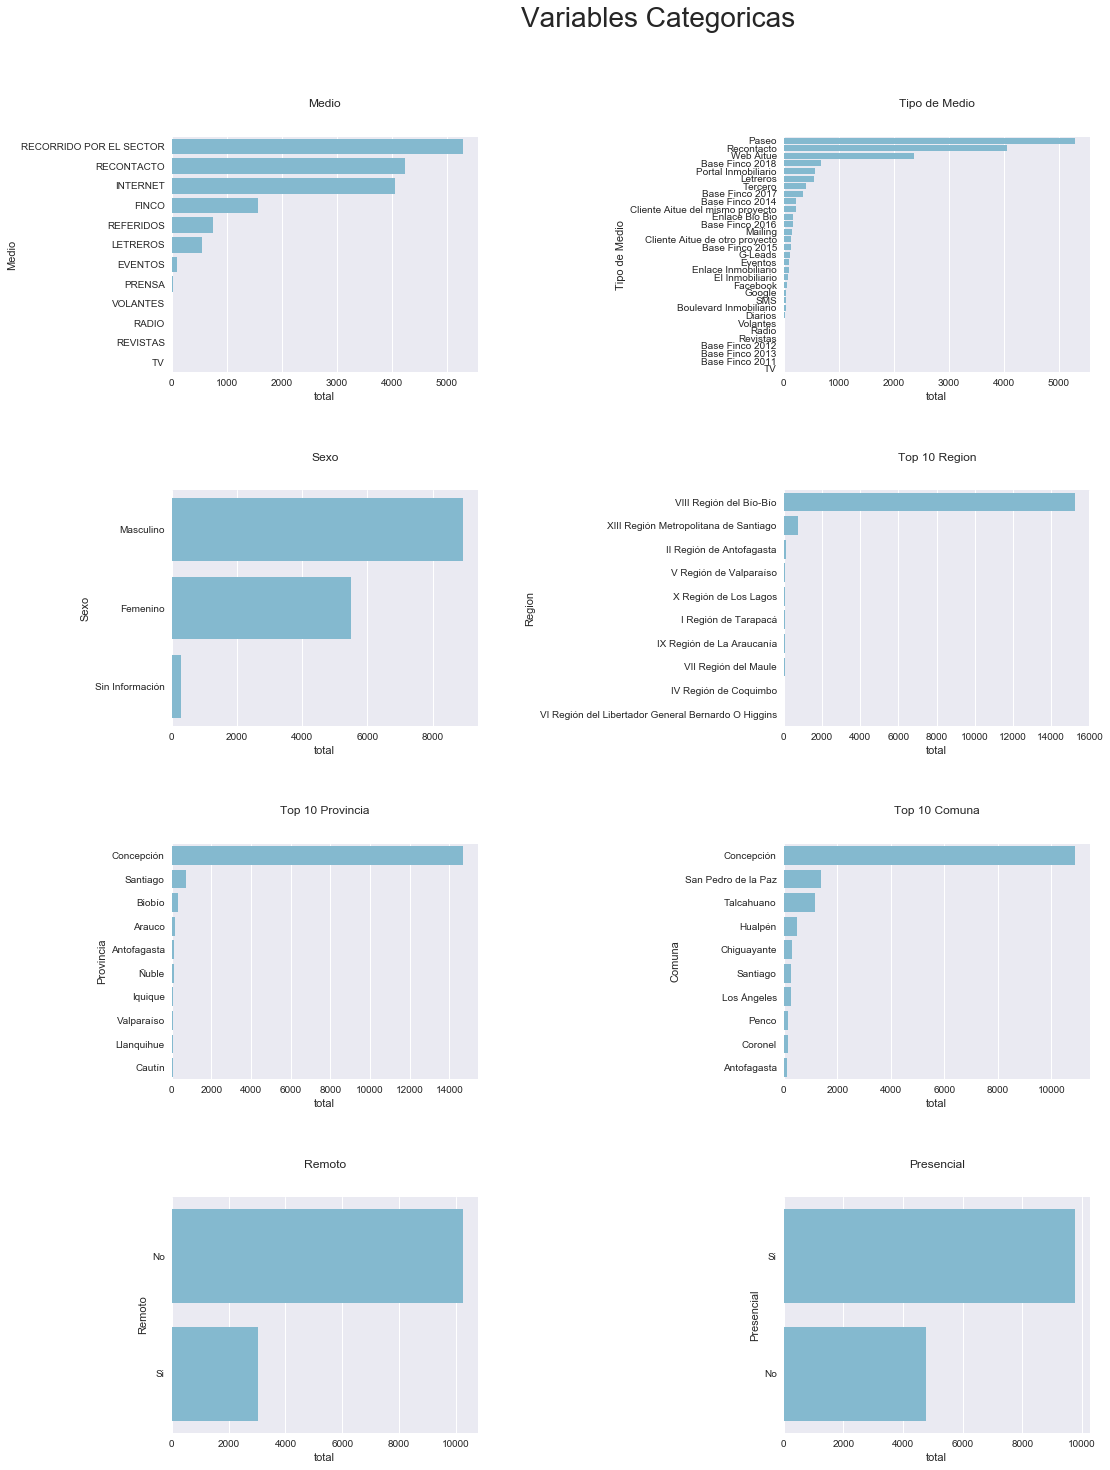

In [28]:
df = cot_all

fig, ax = plt.subplots(figsize=(15,20), ncols=2, nrows=4)

left   =  0.05  # the left side of the subplots of the figure
right  =  0.9    # the right side of the subplots of the figure
bottom =  0.1    # the bottom of the subplots of the figure
top    =  1    # the top of the subplots of the figure
wspace =  1.0     # the amount of width reserved for blank space between subplots
hspace =  0.5    # the amount of height reserved for white space between subplots

# This function actually adjusts the sub plots using the above paramters
plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)

# The amount of space above titles
y_title_margin = 1.1

plt.suptitle("Variables Categoricas", y = 1.09, fontsize=28)

###[0][:]

ax[0][0].set_title("Medio",y = y_title_margin)
ax[0][1].set_title("Tipo de Medio",y = y_title_margin)
# ax[0][2].set_title("Starndardized (StardardScaler)", y = y_title_margin)

sb.countplot(y='Medio', data=cot_all, color="c", order=cot_all['Medio'].value_counts().index,ax=ax[0][0]);
sb.countplot(y='Tipo de Medio', data=cot_all, color="c", order=cot_all['Tipo de Medio'].value_counts().index,ax=ax[0][1]);

# Set all labels on the row axis of subplots for bathroom data to "bathrooms"
[ax[0][i].set_xlabel("total") for i in range(0, 2)]

###[1][:]

ax[1][0].set_title("Sexo", y = y_title_margin)
ax[1][1].set_title("Top 10 Region", y = y_title_margin)

sb.countplot(y='Sexo', data=cot_all, color="c", order=cot_all['Sexo'].value_counts().index[:10],ax=ax[1][0]);
sb.countplot(y='Region', data=cot_all, color="c", order=cot_all['Region'].value_counts().index[:10],ax=ax[1][1]);
# Set all labels on the row axis of subplots for square_feet data to "square_feet"

[ax[1][i].set_xlabel("total") for i in range(0, 2)]

###[2][:]
ax[2][0].set_title("Top 10 Provincia",y = y_title_margin)
ax[2][1].set_title("Top 10 Comuna",y = y_title_margin)

sb.countplot(y='Provincia', data=cot_all, color="c", order=cot_all['Provincia'].value_counts().index[:10],ax=ax[2][0]);
sb.countplot(y='Comuna', data=cot_all, color="c", order=cot_all['Comuna'].value_counts().index[:10],ax=ax[2][1]);

# Set all labels on the row axis of subplots for square_feet data to "square_feet"
[ax[2][i].set_xlabel("total") for i in range(0, 2)]

###[2][:]
ax[3][0].set_title("Remoto",y = y_title_margin)
ax[3][1].set_title("Presencial",y = y_title_margin)

sb.countplot(y='Remoto', data=cot_all, color="c", order=cot_all['Remoto'].value_counts().index[:10],ax=ax[3][0]);
sb.countplot(y='Presencial', data=cot_all, color="c", order=cot_all['Presencial'].value_counts().index[:10],ax=ax[3][1]);

# Set all labels on the row axis of subplots for square_feet data to "square_feet"
[ax[3][i].set_xlabel("total") for i in range(0, 2)]

In [29]:
#rows
df = cot_all
print("Filas: ",df.shape[0])
print("Columnas: ",df.shape[1])
print("Primer Registro: ",(pd.to_datetime(df['Fecha Cotizacion'].tolist()).min()))
print("Ultimo Registro: ",pd.to_datetime(df['Fecha Cotizacion'].tolist()).max())
print("Ruts Unicos: ",len(df['RUT'].unique()))

Filas:  16592
Columnas:  41
Primer Registro:  2013-08-19 16:58:26
Ultimo Registro:  2018-05-22 13:42:53
Ruts Unicos:  6184


# 3.Explore Data

### 3.1.Explore Data: Single File Cotizacion

In [30]:
print("Cot rut promedio: ",get_col_group_description(df,'RUT')['mean'])
print("Cot rut desviacion: ",get_col_group_description(df,'RUT')['std'])
print("Cot por rut maximo: ",get_col_group_description(df,'RUT')['max'])


Cot rut promedio:  2.683053040103493
Cot rut desviacion:  2.6119688668842644
Cot por rut maximo:  45


### 2.4.Describe Data Combined Files: Negociacion

In [31]:
neg_all = pd.concat(neg)
neg_all.to_excel(data_directory +'negocios_all.xlsx')
neg_all_resume = pd.DataFrame()

In [32]:
neg_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2347 entries, 0 to 202
Data columns (total 49 columns):
ID                               2347 non-null int64
Fecha Cotizacion                 2347 non-null datetime64[ns]
ID Cotizacion                    2347 non-null int64
Medio                            2347 non-null object
Tipo de Medio                    2347 non-null object
Proyecto                         2347 non-null object
Etapa                            2347 non-null object
Productos                        2322 non-null object
Jefe Comercial                   2347 non-null object
Ejecutivo Comercial              2347 non-null object
Total Productos                  2347 non-null float64
Descuentos                       2344 non-null float64
Valor Final Venta                2344 non-null float64
Estado                           2347 non-null object
Estado Comercial                 2347 non-null object
Fecha Promesa                    583 non-null datetime64[ns]
Fecha Escritur

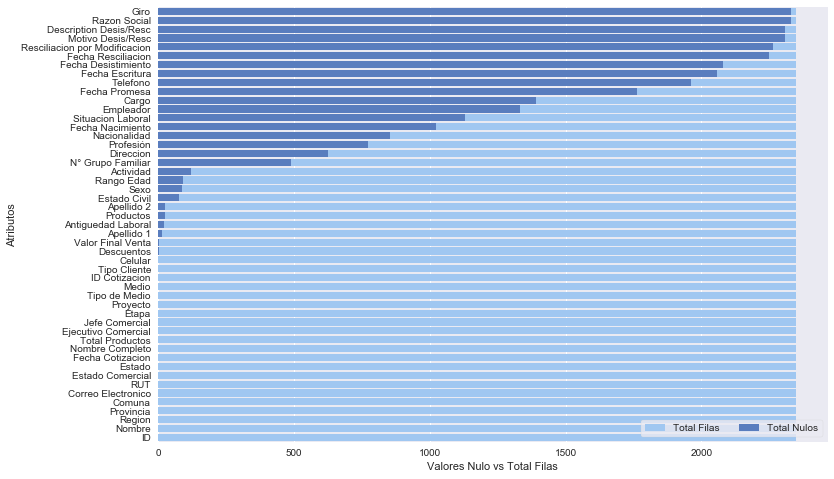

In [78]:
df = neg_all
#view columns with null only
# null_columns = df.columns[df.isnull().any()]
# null_df = df[null_columns].isnull().sum()

#view all columns with its null count
null_columns = df.columns
null_df =  df.shape[0] - df.count()

nulos = pd.DataFrame({'Total':null_df,'Etiquetas':null_columns})

columnas = null_columns.copy()
filas = [df.shape[0]] * len(null_columns)

totales = pd.DataFrame({'Total':filas,'Etiquetas':columnas})

f, ax = plt.subplots(figsize=(12, 8))

sb.set_color_codes("pastel")
sb.barplot(data=totales.sort_values(by='Total',ascending=False), x='Total', y='Etiquetas',color="b",label="Total Filas")

sb.set_color_codes("muted")
sb.barplot(data=nulos.sort_values(by='Total',ascending=False), x='Total', y='Etiquetas',color="b",label="Total Nulos")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set( ylabel="Atributos", xlabel="Valores Nulo vs Total Filas")
f.savefig("neg_all_attributes.png")

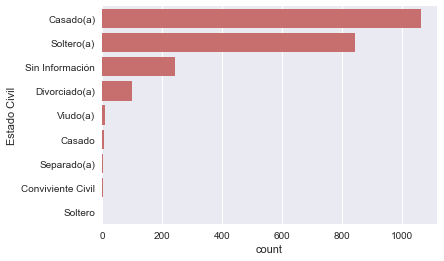

In [34]:
ver_atributo_categorico(neg_all,'Estado Civil')

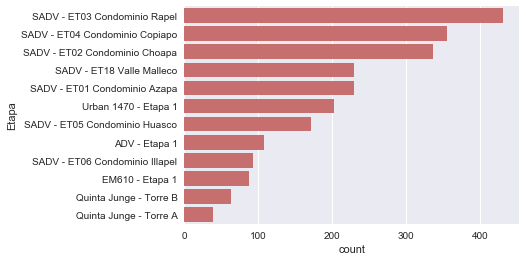

In [35]:
ver_atributo_categorico(neg_all,'Etapa')

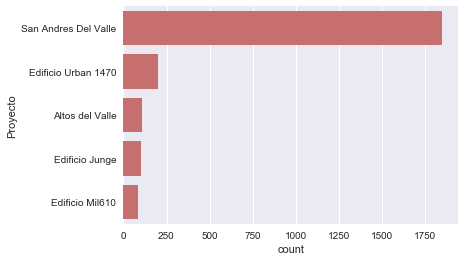

In [36]:
ver_atributo_categorico(neg_all,'Proyecto')

3 ['Normal', 'Desistimiento', 'Resciliacion']


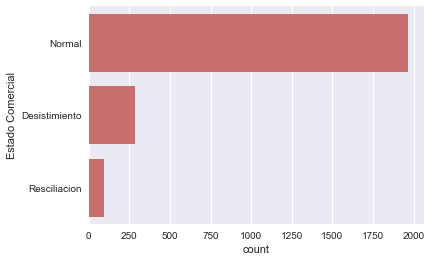

In [37]:
ver_atributo_categorico(neg_all,'Estado Comercial',log=True)

5 ['Anulada', 'Promesado', 'Reservado', 'Escriturado', 'Entregado']


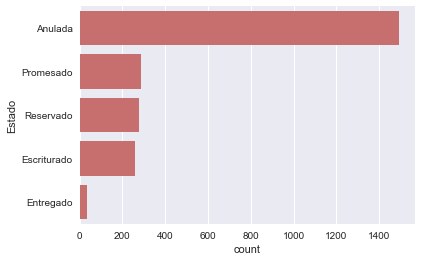

In [38]:
ver_atributo_categorico(neg_all,'Estado',log=True)

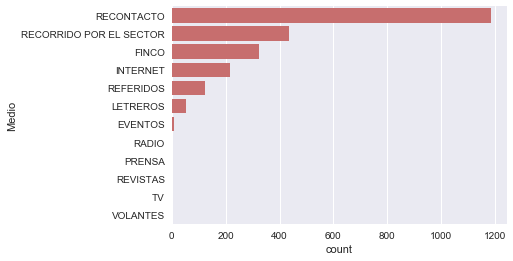

In [39]:
ver_atributo_categorico(neg_all,'Medio')

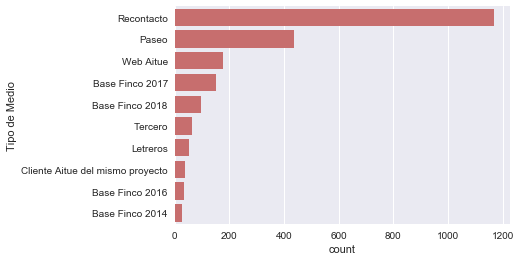

In [40]:
ver_atributo_categorico(neg_all,'Tipo de Medio',limit=True,lim=10)

In [41]:
#rows
df = neg_all
print("Filas: ",df.shape[0])
print("Columnas: ",df.shape[1])
print("Primer Registro: ",(pd.to_datetime(df['Fecha Cotizacion'].tolist()).min()))
print("Ultimo Registro: ",pd.to_datetime(df['Fecha Cotizacion'].tolist()).max())
print("Ruts Unicos: ",len(df['RUT'].unique()))

Filas:  2347
Columnas:  49
Primer Registro:  2013-08-19 18:35:56.620000
Ultimo Registro:  2018-05-21 17:12:31.210000
Ruts Unicos:  1103


### 3.2.Data Exploration: Negocios

In [42]:
print("Neg rut promedio: ",get_col_group_description(df,'RUT')['mean'])
print("Neg rut desviacion: ",get_col_group_description(df,'RUT')['std'])
print("Neg por rut maximo: ",get_col_group_description(df,'RUT')['max'])
print("Neg estado anulados: ",len(df[df['Estado'] == 'Anulada'])/neg_all.shape[0])
print("Neg estado promesa: ",len(df[df['Estado'] == 'Promesado'])/neg_all.shape[0])
print("Neg estado reservado: ",len(df[df['Estado'] == 'Reservado'])/neg_all.shape[0])
print("Neg estado comercial desistimiento: ",len(df[df['Estado Comercial'] == 'Desistimiento'])/neg_all.shape[0])
print("Neg estado comercial normal: ",len(df[df['Estado Comercial'] == 'Normal'])/neg_all.shape[0])

Neg rut promedio:  2.127833182230281
Neg rut desviacion:  1.7149326870075374
Neg por rut maximo:  17
Neg estado anulados:  0.6352790796761824
Neg estado promesa:  0.12228376651043886
Neg estado reservado:  0.11844908393694077
Neg estado comercial desistimiento:  0.12270984235193864
Neg estado comercial normal:  0.8363868768640818


In [43]:
#columns droped 'Fecha Promesa', 'Telefono', 'Fecha Escritura', 'Fecha Desistimiento', 'Fecha Resciliacion', 
# 'Resciliacion por Modificacion', 'Motivo Desis/Resc', 'Description Desis/Resc'

#columnas no importantes para el sgte paso
unimportant_columns = ['Apellido 1','Apellido 2','Celular','Ejecutivo Comercial','Region','Provincia','Jefe Comercial','ID']
to_select_cols = df.count().sort_values(ascending=True).index.tolist()
to_select_cols = to_select_cols[8:]
to_select_cols = [item for item in to_select_cols if item not in unimportant_columns]
# to_select_cols

### 3.3.Exploracion de los ruts 

In [44]:
## Clientes en Negocios que no estan en Cotizaciones

cot_rut = cot_all['RUT'].unique().tolist()
neg_rut = neg_all['RUT'].unique().tolist()

not_in = [item for item in neg_rut if item not in cot_rut]
print("Clientes en neg que no esta en cot: ",not_in)

## Clientes en Cotizaciones que no estan en Negocios
not_in = [item for item in cot_rut if item not in neg_rut]
print("Clientes en cot que no estan en neg ",len(not_in))

# verificacion si los numeros encajan
print("cantidad de ruts unicos en cot: ",len(cot_rut))
print("cantidad de ruts unicos en neg: ",len(neg_rut))
print("total de ruts unicos en cot: neg_ruts_unicos + cot_not_in_neg = ",len(not_in) +len(neg_rut))

Clientes en neg que no esta en cot:  ['15671306-6']
Clientes en cot que no estan en neg  5082
cantidad de ruts unicos en cot:  6184
cantidad de ruts unicos en neg:  1103
total de ruts unicos en cot: neg_ruts_unicos + cot_not_in_neg =  6185


### 3.4.Exploracion de ID y ID COTIZACION 

In [45]:
# hay 7 id_negocio que tienen mas de un id_cotizacion
print("Filas :",neg_all['ID Cotizacion'].shape[0])
print("ID Cot unicos ",len(neg_all['ID Cotizacion'].unique()))

Filas : 2347
ID Cot unicos  2340


In [46]:
# que filas en negocios correspondern a los 7 ruts que tienen mas de 1 negocio
neg_id_cot_count = neg_all.groupby('ID Cotizacion').count().sort_values(by='ID',ascending=False)
neg_multiples_id = neg_id_cot_count[neg_id_cot_count['ID'] >= 2]

neg_id_rep = neg_multiples_id['ID'].index.tolist()

# view = neg_all.loc[neg_all['ID Cotizacion']==multiple_rows[1]]
view = neg_all.loc[neg_all['ID Cotizacion'].isin(neg_id_rep)]
view.loc[:,to_select_cols]
# df.loc[df['column_name'].isin(some_values)]

,Telefono,Fecha Promesa,Cargo,Empleador,Situacion Laboral,Fecha Nacimiento,Nacionalidad,Profesión,Direccion,N° Grupo Familiar,...,Tipo de Medio,Proyecto,Etapa,Total Productos,Estado,Correo Electronico,Comuna,Estado Comercial,RUT,Nombre
85,NaN,NaT,NaN,NaN,Independiente,1967-01-20,Chilena,Profesor,Camino Al Venado 585,Sin Información,...,Recontacto,Altos del Valle,ADV - Etapa 1,6040.0,Anulada,lulapolidori@gmail.com / galcazar@molicop.cl,San Pedro de la Paz,Normal,9879501-4,Maria de la Luz
88,NaN,2018-02-22,NaN,NaN,Independiente,1967-01-20,Chilena,Profesor,Camino Al Venado 585,Sin Información,...,Recontacto,Altos del Valle,ADV - Etapa 1,6040.0,Promesado,lulapolidori@gmail.com / galcazar@molicop.cl,San Pedro de la Paz,Normal,9879501-4,Maria de la Luz
4,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,Avenida inglesa 220 9F Pedro de Valdivia,2,...,Tercero,Edificio Junge,Quinta Junge - Torre B,8934.0,Anulada,arturospoerer@vtr.net,Concepción,Normal,4028907-0,Gustavo Arturo
5,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,Avenida inglesa 220 9F Pedro de Valdivia,2,...,Tercero,Edificio Junge,Quinta Junge - Torre B,8934.0,Anulada,arturospoerer@vtr.net,Concepción,Normal,4028907-0,Gustavo Arturo
6,NaN,2016-02-12,NaN,NaN,NaN,NaT,NaN,NaN,Avenida inglesa 220 9F Pedro de Valdivia,2,...,Tercero,Edificio Junge,Quinta Junge - Torre B,8934.0,Escriturado,arturospoerer@vtr.net,Concepción,Normal,4028907-0,Gustavo Arturo
13,982297510,NaT,NaN,NaN,NaN,NaT,NaN,NaN,Vilumanque,NaN,...,Cliente Aitue de otro proyecto,Edificio Junge,Quinta Junge - Torre B,5447.0,Anulada,subgerenteassuan.cl,Concepción,Normal,16766381-8,Cristian Jesus
14,982297510,2016-08-31,NaN,NaN,NaN,NaT,NaN,NaN,Vilumanque,NaN,...,Cliente Aitue de otro proyecto,Edificio Junge,Quinta Junge - Torre B,5447.0,Promesado,subgerenteassuan.cl,Concepción,Resciliacion,16766381-8,Cristian Jesus
125,78442661,NaT,Dueño,NaN,NaN,1985-10-04,NaN,NaN,av. Los Presidentes 1533 Depto casa 5,Sin Información,...,Paseo,San Andres Del Valle,SADV - ET02 Condominio Choapa,3835.0,Anulada,claudiogajardo_s@hotmail.com,Concepción,Normal,16138640-5,Claudio Alberto
135,NaN,2014-04-30,Ejecutivo,Banco Bice,Dependiente,1979-08-19,Chilena,NaN,Ramón Carrasco 239 Depto 264,3,...,Recontacto,San Andres Del Valle,SADV - ET01 Condominio Azapa,3532.0,Anulada,mbarra@bice.cl,Concepción,Normal,13628528-9,Mario Marcel
142,NaN,2014-04-30,Ejecutivo,Banco Bice,Dependiente,1979-08-19,Chilena,NaN,Ramón Carrasco 239 Depto 264,3,...,Recontacto,San Andres Del Valle,SADV - ET01 Condominio Azapa,3532.0,Promesado,mbarra@bice.cl,Concepción,Resciliacion,13628528-9,Mario Marcel


### 2.5.Data Description Table Relations: Negocios & Cotizaciones

### 2.5.1.Columnas

In [79]:
cot_cols = cot_all.columns.tolist()
neg_cols = neg_all.columns.tolist()

In [84]:
# ver columnas de negocios que no estan en las columnas de cotizaciones
not_in = [item for item in neg_cols if item not in cot_cols]
print("No en cotizaciones: ",not_in)

No en cotizaciones ['ID Cotizacion', 'Estado', 'Estado Comercial', 'Fecha Promesa', 'Fecha Escritura', 'Fecha Desistimiento', 'Fecha Resciliacion', 'Motivo Desis/Resc', 'Description Desis/Resc', 'Resciliacion por Modificacion']


In [85]:
# ver columnas de cotizaciones que no estan en las columnas de negocios
not_in = [item for item in cot_cols if item not in neg_cols]
print("No en negocios:",not_in)

No en negocios ['Presencial', 'Remoto']


In [86]:
# ver columnas compartidas
not_in = [item for item in cot_cols if item in neg_cols]
print("Compartidas: ",not_in)

Compartidas ['ID', 'Fecha Cotizacion', 'Medio', 'Tipo de Medio', 'Proyecto', 'Etapa', 'Productos', 'Jefe Comercial', 'Ejecutivo Comercial', 'Total Productos', 'Descuentos', 'Valor Final Venta', 'RUT', 'Nombre', 'Apellido 1', 'Apellido 2', 'Nombre Completo', 'Telefono', 'Celular', 'Direccion', 'Region', 'Provincia', 'Comuna', 'Correo Electronico', 'Sexo', 'Estado Civil', 'Rango Edad', 'Fecha Nacimiento', 'Tipo Cliente', 'Razon Social', 'Giro', 'Nacionalidad', 'N° Grupo Familiar', 'Actividad', 'Cargo', 'Situacion Laboral', 'Empleador', 'Antiguedad Laboral', 'Profesión']


### 2.5.2.Merging de las tablas (Necesario?). Negocios es subconjunto de Cotizacion

In [51]:
print(cot_all['ID'].shape[0])
print(len(cot_all['ID'].unique()))

neg_all.set_index('ID Cotizacion')
cot_all.set_index('ID')
print(neg_all.shape[0])
print(cot_all.shape[0])

merged_all =pd.merge(cot_all, neg_all, how='inner', left_index=True, right_index=True)
merged_all.shape[0]

16592
16592
2347
16592


9308

### 3.3.Exploración de Estado

In [52]:
# ver ruts de estado == entregado
neg_listos = neg_all.loc[neg_all['Estado'] == 'Entregado']

neg_listos.shape[0]

neg_listos_ruts = neg_listos.RUT.tolist()
neg_listos_ruts_unicos = neg_listos.RUT.unique().tolist()

cot_listos_rut = cot_all.loc[cot_all['RUT'].isin(neg_listos_ruts)]
# cot_listos_rut.info()

### 3.4.Explore: Ver atributos de los cotizantes que llegan a Negocio

In [53]:
# ruts de los clientes en negocio
neg_ruts = neg_all['RUT'].unique().tolist()

cot_neg = cot_all.copy()
cot_neg['Negocio'] = cot_all['RUT'].isin(neg_ruts)

print(neg_all.shape[0])
print("Nro Filas en cot que tienen ruts en neg :",cot_neg.loc[cot_neg['Negocio']==True].shape[0])


2347
Nro Filas en cot que tienen ruts en neg : 5697


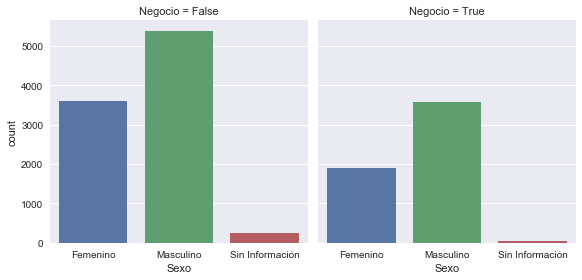

In [54]:
sb.factorplot(x='Sexo', col='Negocio', kind='count', data=cot_neg);

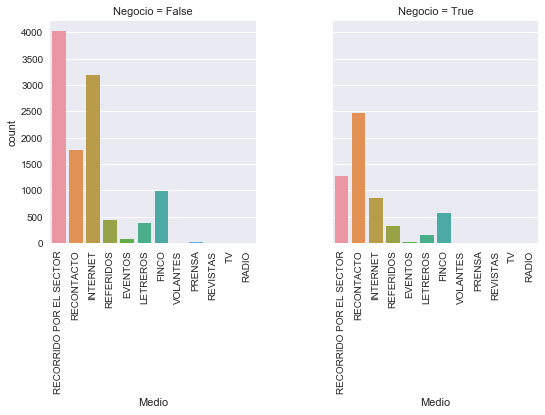

In [55]:
g = sb.factorplot(x='Medio', col='Negocio', kind='count', data=cot_neg);
g.set_xticklabels(rotation=90)

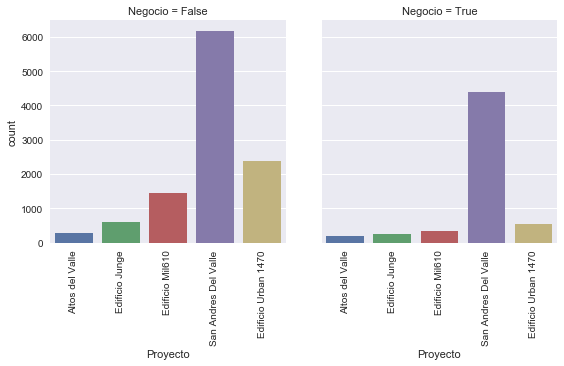

In [56]:
g = sb.factorplot(x='Proyecto', col='Negocio', kind='count', data=cot_neg);
g.set_xticklabels(rotation=90)

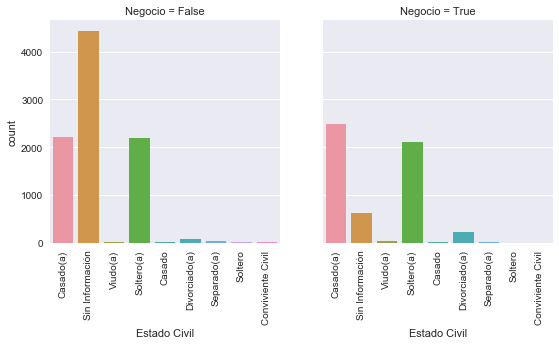

In [57]:
g = sb.factorplot(x='Estado Civil', col='Negocio', kind='count', data=cot_neg);
g.set_xticklabels(rotation=90)

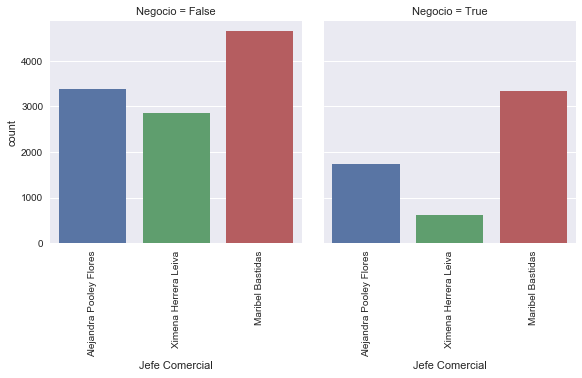

In [58]:
g = sb.factorplot(x='Jefe Comercial', col='Negocio', kind='count', data=cot_neg);
g.set_xticklabels(rotation=90)

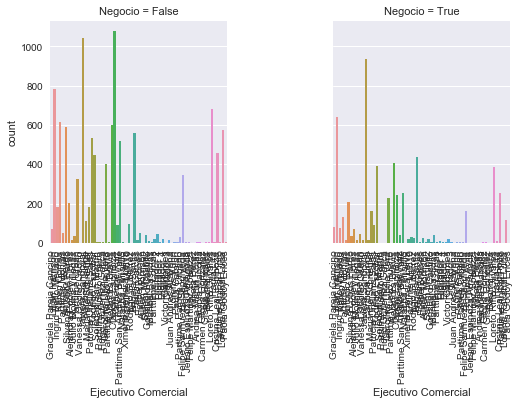

In [59]:
g = sb.factorplot(x='Ejecutivo Comercial', col='Negocio', kind='count', data=cot_neg);
g.set_xticklabels(rotation=90)

### Comparacion Edades

In [60]:
### Ver edades en cotizantes y cotizantes que llegan a negocios
rango_edad = cot_neg['Rango Edad'].tolist()
rango_edad_min = [];rango_edad_max = []

for e in rango_edad:
    try:
        edad = e.split('-')
        rango_edad_min.append(int(edad[0]))
        rango_edad_max.append(int(edad[1]))
    except (ValueError, AttributeError):
        rango_edad_min.append(0)
        rango_edad_max.append(0)

In [61]:
cot_neg['Edad Min'] = rango_edad_min
cot_neg['Edad Max'] = rango_edad_max

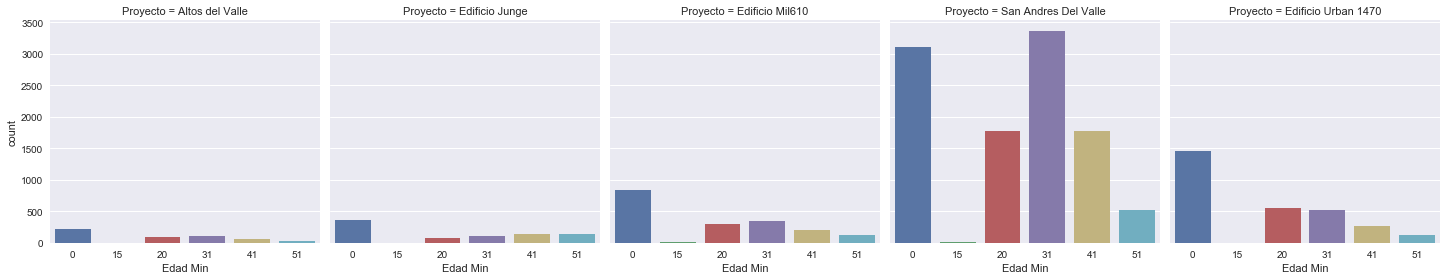

In [62]:
g = sb.factorplot(x='Edad Min', col='Proyecto', kind='count', data=cot_neg);

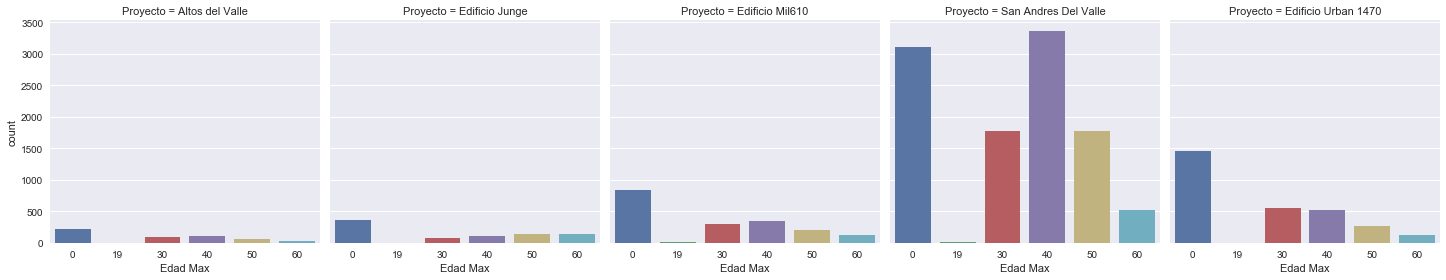

In [63]:
g = sb.factorplot(x='Edad Max', col='Proyecto', kind='count', data=cot_neg);

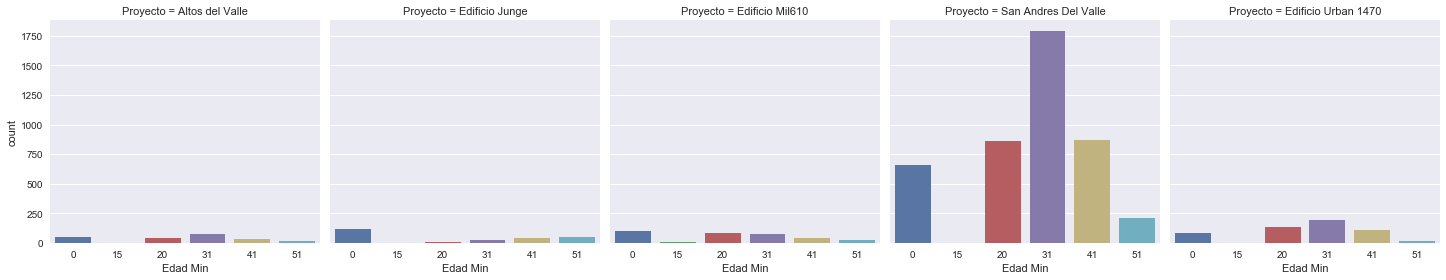

In [64]:
cot_neg_si = cot_neg[cot_neg['Negocio']==True]
g = sb.factorplot(x='Edad Min', col='Proyecto', kind='count', data=cot_neg_si);

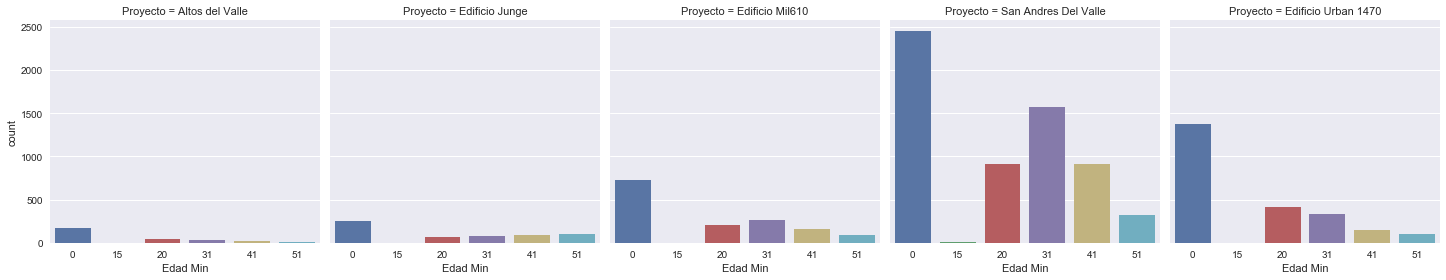

In [65]:
cot_neg_no = cot_neg[cot_neg['Negocio']==False]
g = sb.factorplot(x='Edad Min', col='Proyecto', kind='count', data=cot_neg_no);

### Comparacion Presenciales

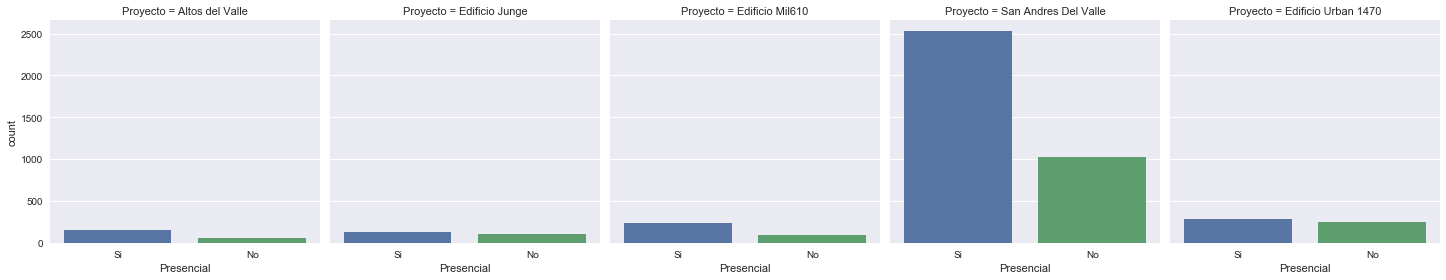

In [66]:
cot_neg_si = cot_neg[cot_neg['Negocio']==True]
g = sb.factorplot(x='Presencial', col='Proyecto', kind='count', data=cot_neg_si);

### Comparacion Grupos Familiares

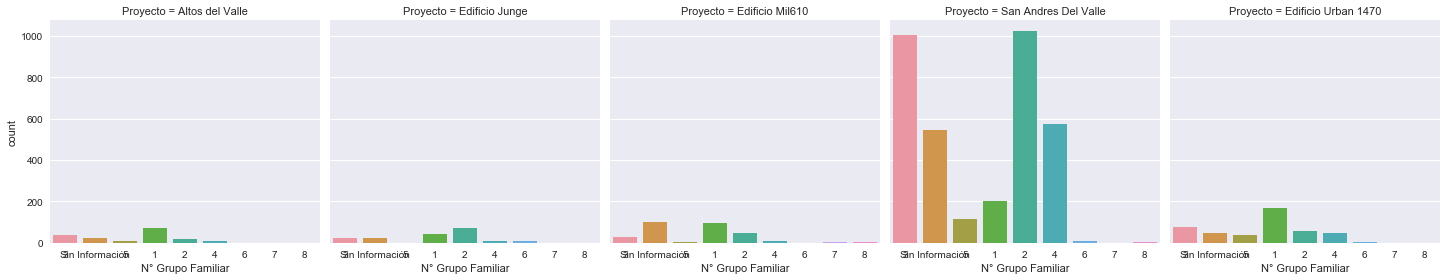

In [87]:
cot_neg_si = cot_neg[cot_neg['Negocio']==True]
g = sb.factorplot(x='N° Grupo Familiar', col='Proyecto', kind='count', data=cot_neg_si);

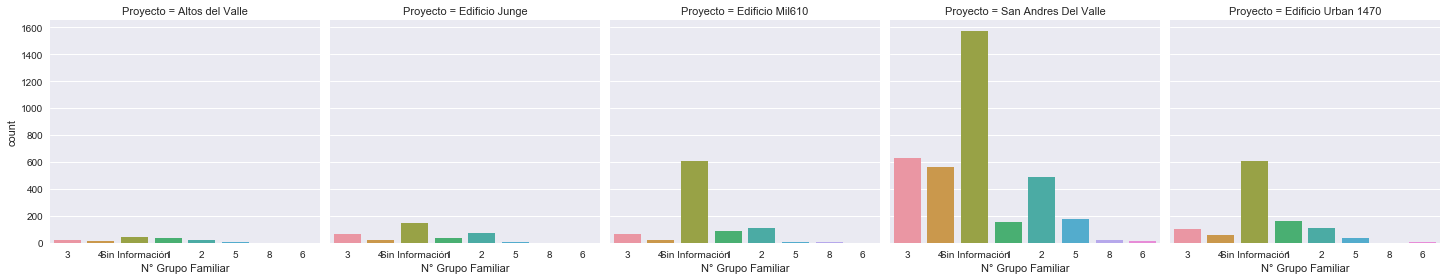

In [97]:
cot_neg_si = cot_neg[cot_neg['Negocio']==False]
g = sb.factorplot(x='N° Grupo Familiar', col='Proyecto', kind='count', data=cot_neg_si);

In [102]:
cot_neg.groupby('Negocio').head()

,ID,Fecha Cotizacion,Medio,Tipo de Medio,Proyecto,Etapa,Productos,Presencial,Remoto,Jefe Comercial,...,N° Grupo Familiar,Actividad,Cargo,Situacion Laboral,Empleador,Antiguedad Laboral,Profesión,Negocio,Edad Min,Edad Max
0,111502,2017-07-27 15:46:54.000,RECORRIDO POR EL SECTOR,Paseo,Altos del Valle,ADV - Etapa 1,"TB-104,Est-65",Si,No,Alejandra Pooley Flores,...,3,Tecnico,NaN,NaN,NaN,0.0,NaN,True,41,50
1,111611,2017-07-29 13:37:05.000,RECONTACTO,Recontacto,Altos del Valle,ADV - Etapa 1,"TA-302,Est-41,Bod-02",No,No,Alejandra Pooley Flores,...,Sin Información,Empleado,NaN,NaN,NaN,0.0,NaN,True,31,40
2,111629,2017-07-29 16:41:15.000,RECORRIDO POR EL SECTOR,Paseo,Altos del Valle,ADV - Etapa 1,"TA-303,Est-01",Si,No,Alejandra Pooley Flores,...,3,Empleado,NaN,NaN,NaN,0.0,NaN,False,31,40
3,111766,2017-07-31 11:01:57.000,RECONTACTO,Recontacto,Altos del Valle,ADV - Etapa 1,"TA-302,Est-41,Bod-06",No,No,Alejandra Pooley Flores,...,Sin Información,Empleado,a,Sin Información,a,1.0,Empresario,True,0,0
4,111794,2017-07-31 15:52:32.000,RECORRIDO POR EL SECTOR,Paseo,Altos del Valle,ADV - Etapa 1,"TA-604,Est-01",Si,No,Alejandra Pooley Flores,...,4,Profesional,NaN,NaN,NaN,0.0,Constructor Civil,False,41,50
5,111992,2017-08-02 18:01:42.000,INTERNET,Web Aitue,Altos del Valle,ADV - Etapa 1,"TB-302,Est-29,Bod-02",Si,No,Alejandra Pooley Flores,...,NaN,Tecnico,NaN,NaN,NaN,0.0,NaN,False,20,30
6,112032,2017-08-03 11:32:31.517,INTERNET,Web Aitue,Altos del Valle,ADV - Etapa 1,TB-303,No,Si,Alejandra Pooley Flores,...,NaN,Empleado,NaN,NaN,NaN,0.0,NaN,False,0,0
7,112044,2017-08-03 12:47:30.930,INTERNET,Web Aitue,Altos del Valle,ADV - Etapa 1,"TB-303,Est-29",No,Si,Alejandra Pooley Flores,...,NaN,Empleado,NaN,NaN,NaN,0.0,NaN,False,0,0
11,112677,2017-08-11 16:07:35.000,RECONTACTO,Recontacto,Altos del Valle,ADV - Etapa 1,"Bod-02,Est-26",No,No,Alejandra Pooley Flores,...,5,Profesional,Matrona,Dependiente,NaN,1.0,Matrona,True,41,50
12,112680,2017-08-11 16:13:40.000,RECONTACTO,Recontacto,Altos del Valle,ADV - Etapa 1,"Est-17,Est-18",No,No,Alejandra Pooley Flores,...,Sin Información,Profesional,Odontologo,Dependiente,Cesfam Lautaro Caceres,5.0,Odontólogo,True,20,30
